## Корреляция. Коэффициент корреляции Пирсона  
Корреляция обозначает силу и характер взаимосвязи между двумя количественными переменными.  
Взаимосвязь может быть положительной (когда одна переменная растёт, другая тоже растёт),  
либо отрицательной (когда одна переменная растёт, другая уменьшается), либо отсутствовать.

Требования к данным:
* Связь линейна и монотонна (нарастает или убывает в одном направлении, не меняя его)
* Отсутствуют выбросы
* Переменные нормально распределены

### Задача  
Определить взаимосвязь двух переменных вес и роста у студентов по полученным измерениям.

<AxesSubplot:xlabel='Weight', ylabel='Height'>

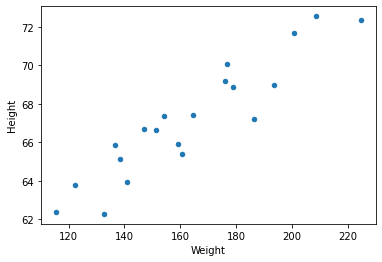

In [1]:
import pandas as pd

weight_height_data = pd.read_csv('./data/weight-height.csv')
sample = weight_height_data.sample(20)
sample['Weight'].apply(lambda pounds: pounds * 0.453592)
sample['Weight'].apply(lambda inches: inches * 2,54)

sample.plot.scatter(x='Weight', y='Height')
# sns.scatterplot(x='Weight', y='Height', data=sample)

In [2]:
import numpy as np
import scipy.stats as st

weight = np.array(weight_height_data['Weight'])
weight_mean = np.mean(weight)
height = np.array(weight_height_data['Height'])
height_mean = np.mean(height)

corr = sum((weight - weight_mean) * (height - height_mean)) / (sum((weight - weight_mean) ** 2) * sum((height - height_mean) ** 2)) ** 0.5
print('corr: ', corr)

corr:  0.9247562987409161


In [3]:
print('corr_table numpy:', np.corrcoef(weight, height), sep='\n')
print('corr_table pandas, pearson:', sample.corr(method='pearson'), sep='\n')
print('corr_table scipy:', st.pearsonr(weight, height))

corr_table numpy:
[[1.        0.9247563]
 [0.9247563 1.       ]]
corr_table pandas, pearson:
          Height    Weight
Height  1.000000  0.927783
Weight  0.927783  1.000000
corr_table scipy: (0.9247562987409146, 0.0)


In [4]:
# H0: corr_xy = 0
# H1: corr_xy != 0
alpha = 0.05

df = len(sample) - 2

t = (corr * (df ** 0.5)) / ((1 - (corr ** 2)) ** 0.5)
print('t:', t)

p_value = 2 * (1 - st.t.cdf(abs(t), df))
print('p_value:', p_value)

if p_value > alpha:
    print(f'p_value(X < {t:.2f} or X > {t:.2f}) > alpha. Do not reject H0')
else:
    print(f'p_value(X < {t:.2f} or X > {t:.2f}) < alpha. Reject H0')

t: 10.3095711604472
p_value: 5.575071959640354e-09
p_value(X < 10.31 or X > 10.31) < alpha. Reject H0


### Задача  
Определить взаимосвязь двух переменных агрессивности и IQ у школьников по полученным данным тестирования.

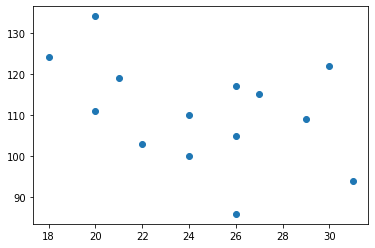

corr:  -0.4210924254590838
t: -1.9696901074139632
p_value: 0.06446019549646675
p_value(X < -1.97 or X > -1.97) > alpha. Do not reject H0


In [5]:
import matplotlib.pyplot as plt

Xagr = np.array([24, 27, 26, 21, 20, 31, 26, 22, 20, 18, 30, 29, 24, 26])
Yiq = np.array([100, 115, 117, 119, 134, 94, 105, 103, 111, 124, 122, 109, 110, 86])

plt.scatter(Xagr, Yiq)
plt.show()

corr = np.corrcoef(Xagr, Yiq)[0][1]
print('corr: ', corr)

# H0: corr_xy = 0
# H1: corr_xy != 0
alpha = 0.05

df = len(sample) - 2

t = (corr * (df ** 0.5)) / ((1 - (corr ** 2)) ** 0.5)
print('t:', t)

p_value = 2 * (1 - st.t.cdf(abs(t), df))
print('p_value:', p_value)

if p_value > alpha:
    print(f'p_value(X < {t:.2f} or X > {t:.2f}) > alpha. Do not reject H0')
else:
    print(f'p_value(X < {t:.2f} or X > {t:.2f}) < alpha. Reject H0')